In [1]:
# Import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define our function for fitting the data (See problem 14 on the "Fall 2019 JTS" sheet)
def func(t, a1, a2, t0, tc, c):
    return a1 * np.exp(-t * (1/t0 + 1/tc)) + a2 * np.exp(-t/t0) + c

In [3]:
# Import all data files
t1 = pd.read_csv("Matt_Jacob_10_8.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t2 = pd.read_csv("muon_data_Jacob_Matt_10_10.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t3 = pd.read_csv("Bjon_10_15.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])
t4 = pd.read_csv("muon_data_Jacob_Matt_10_17.data", delimiter = ' ', names = ["Delta_T", "Timestamp"])

In [4]:
# Combine all data files
t = t1.append(t2)
t = t.append(t3)
t = t.append(t4)

In [5]:
# Remove all data above the threshold of our muon detector
t = t[t["Delta_T"] < 20000]
t = t.reset_index(drop = True)
# Return the number of data points remaining
len(t)

12054

In [6]:
# Determine the maximum number of bins possible based on the minimum spacing between counts
max_bins = np.arange(0,20000, 160)
print("Maximum number of bins: " + str(len(max_bins)))

Maximum number of bins: 125


In [7]:
# Set the number of bins (The third number, currently 80, is the number of bins)
bins = np.linspace(100, 20000, 80)

In [8]:
# Convert the dataset into arrays viable for plotting a histogram
ydata, xdata = np.histogram(t["Delta_T"], bins = bins)
xdata = xdata[:-1]

In [9]:
# Set the bounds for each term in our fitting equation
bounds = ([-np.inf, -np.inf, 2000, 10, -np.inf], [np.inf, 1000, np.inf, np.inf, np.inf])

In [10]:
# Fit our equation to the data
popt, pcov = curve_fit(func, xdata, ydata, bounds = bounds)

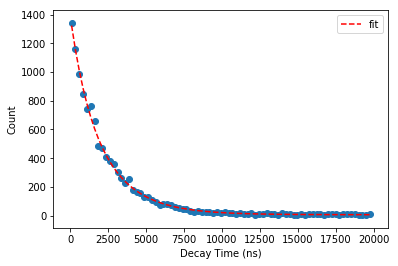

In [11]:
# Plot the data and fitting function
plt.plot(xdata, func(xdata, *popt), 'r--', label='fit')
plt.scatter(xdata, ydata)
plt.ylabel("Count")
plt.xlabel("Decay Time (ns)")
plt.legend()
plt.savefig("Fit7,1.png")

In [12]:
# Print out our finalized equation
print(str(round(popt[0], 2)) + " * e^(-t[1/" + str(round(popt[2], 2)) + ' + 1/' + str(round(popt[3], 2)) + ']) + ' + str(round(popt[1], 2)) + 
     ' * e^(-t/' + str(round(popt[2], 2)) + ') + ' + str(round(popt[4], 2)))

392.38 * e^(-t[1/2366.46 + 1/2139.75]) + 1000.0 * e^(-t/2366.46) + 6.3


In [13]:
# Calculate the R^2 value for our fit
residuals = np.log(ydata)- np.log(func(xdata, *popt))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9999990825338486

In [14]:
# Standard deviation for the free muon lifetime
std = np.sqrt(np.diag(pcov))
std[2]

370.6627121635311

In [15]:
# Standard deviation for the negative muon lifetime
std[3]

1790.1825878967882

In [16]:
# Standard deviation for the negative muon constant
std[0]

427.85062110740256

In [17]:
# Standard deviation for the positive muon constant
std[1]

434.2607035154898